# Introduction
This Jupyter notebook consists of the analysis,hypothesis testing and model building for the set of 9 subjects which includes an adult group of 8 males and 1 female and their corresponding readings taken by wearing three different Inertial Measurements Units and Heart Rate monitor.All the 9 adults were subjected to 18 different physical activities and the readings realated to their hand,chest and ankle were noted down.the information of each adult is then stored in a ".dat" files.  
The process of this data analysis involves an approach is datacleaning followed by hypothesistesting which is then followed by model building.


# CONTENT
Initial steps of importing all the required libraries and loading data from the list of files.

Data Cleaning:

    Function : data_cleaning()
               Sub-Function :fill_null_heartrate() :- replace Null values of heart rate column
               
Exploratory Data Analysis:

    Train,Test data splitting
    Function : train_test_splitting() :- Splitting into train and test set
    
    Correlation through heatmap
    Function : genrate_heatmap() :- Generate Heat-Map
    
    Time and activity Analysis with respect to the actvities undertaken by each subject
    Function : elapsedtime_heartrate() :- Estimating Elapsed Time and mean heart rate for each subject and
                their corresponding activities
  
               Sub-Function : change_milllisec() :- convert calculated elapsedtime to seconds
               
    Function : plot_scatter() :- Plotting a scatter plot between mean heart rate and elapsedtime(sec)
    
    Activity Heartrate Analysis
    Function: activity_heartrate() :- Analyse the heart rate for each activity for a subject at time
    
    
Hypothesis Testing:

    Hypothesis stated : A hypothesis of dependency between activity and human heartrate fluctiations.
    Function : con_cat() :- perform concatenation as per the requirement hypothesis testing
    Perform z-test
    Result based on z-test()

Modelling :
    
    Prediction of heart rate done using polynomial regression and random forest
    an example is illlustrated for both and predictions are obtained

In [1]:
#import all the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats 
#%matplotlib inline
#from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation

In [2]:
# Load  all the data
list_of_files = ['Dataset/Protocol/subject101.dat',
                 'Dataset/Protocol/subject102.dat',
                 'Dataset/Protocol/subject103.dat',
                 'Dataset/Protocol/subject104.dat',
                 'Dataset/Protocol/subject105.dat',
                 'Dataset/Protocol/subject106.dat',
                 'Dataset/Protocol/subject107.dat',
                 'Dataset/Protocol/subject108.dat',
                 'Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }
              
colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3', 
           'hand_acc6_1', 'hand_acc6_2', 'hand_acc6_3', 
           'hand_gyro1', 'hand_gyro2', 'hand_gyro3', 
           'hand_magne1', 'hand_magne2', 'hand_magne3',
           'hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4']

IMUchest = ['chestTemperature', 
           'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3', 
           'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3', 
           'chest_gyro1', 'chest_gyro2', 'chest_gyro3', 
           'chest_magne1', 'chest_magne2', 'chest_magne3',
           'chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4']

IMUankle = ['ankleTemperature', 
           'ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3', 
           'ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3', 
           'ankle_gyro1', 'ankle_gyro2', 'ankle_gyro3', 
           'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
           'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 'ankle_orientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list



In [3]:
for file in list_of_files: #List of all subjects that are loaded
    print(file[17:27])

subject101
subject102
subject103
subject104
subject105
subject106
subject107
subject108
subject109


Initially,
Let us create a dataframe(pandas) "datafr" by reading the .dat files as .csv files and then concatenates the same inorder to carry out the operations and analysis.

In [4]:
#creating the dataframe
datafr = pd.DataFrame()
for file in list_of_files:
    #procData = pd.read_table(file, header=None, sep='\s+')
    df = pd.read_csv(file,sep='\s+|\s+',engine='python')
    strfile=file[17:27]+'.csv'
    df.to_csv(strfile, index=None)
    phydf=pd.read_csv(strfile)
    phydf.columns = columns
    phydf['subject_id'] = int(file[-5])
    #dataCollection = dataCollection.append(procData, ignore_index=True)
    datafr=pd.concat([datafr, phydf], ignore_index=True)

#dataCollection.reset_index(drop=True, inplace=True)
datafr.reset_index(drop=True, inplace=True)
#dataCollection.head()
datafr.head()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subject_id
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,1


# Data Cleaning

Let us now perform Data Cleaning for the respective dataframe "datafr".
The data cleaning phase includes :-

    Removal of null values :
    
    The null values (NaN) are removed using the interpolate() for all the columns except the heartrate as incase
    As incase of heartrate I have decided to replace the null values with the mean heartrate of each activity
    activity group.
    This is because even after aplliying interpolation() to heartrate there are NaN values which can either be 
    filled with an assumed value however,I have decided to replace it with mean heartrate of each activity.
    
    Drop the columns:
    
    Dropping all tha data related to activity id = 0 ("other") and all the columns with orientation data as per the
    requirements

    Convert all the columns to numeric.


In [5]:
def fill_null_heartrate(datafr):
    #funtion : fill_null_heartrate : replace the null values in heartrate column with mean heartrate of each activity
    #parameters : datafr : dataframe
    
    act_name=list(set(datafr['activityID'].values))
    datedd=datafr
    for act in act_name:
        mean_num = np.mean(datafr[datafr['activityID']== act]['heartrate'])
        datedd.loc[datedd['activityID']== act, ['heartrate']]=datedd.loc[datedd['activityID']== act, ['heartrate']].fillna(mean_num)
    return datedd

In [6]:
def data_cleaning(datafr):
    #function : data_cleaning : perform all the datacleaing activites
    #parameter : datafr : dataframe
    
    datafr = datafr.drop(datafr[datafr['activityID'] == 0].index)
    datafr=datafr.drop(['hand_orientation1','hand_orientation2','hand_orientation3','hand_orientation4','chest_orientation1',
            'chest_orientation2','chest_orientation3','chest_orientation4','ankle_orientation1','ankle_orientation2',
            'ankle_orientation3','ankle_orientation4'],axis=1)
    datafr=fill_null_heartrate(datafr) #call fill_null_heartrate()
    datafr=datafr.apply(pd.to_numeric,errors='coerce')
    datafr=datafr.interpolate()
    #datafr=datafr.fillna(100)
    
    return datafr

# Cleaning Process : data_cleaning()
The function data_cleaning() performs below mentioned functionalities such as :-

    Input : datafr :- dataframe created at the beginneg of the process.
    Output : data :-  dataframe after cleaning.
    
    Droping the data of activityID =0 from datafr

    Drop all the columns related to orientation from the dataframe datafr

    Replace the null values of heartrate with the mean heartrate by calling the function fill_null_heartrate()

    Convert the columns to numeric

    Remove null values from other columns by applying interpolate()

In [7]:
#excuting the data_cleaning() and data_aftercleaning is the new dataframe.
data_aftercleaning = data_cleaning(datafr) #calling data_cleaning()

In [8]:
#checking for null values
data_aftercleaning.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
hand_acc16_1        0
hand_acc16_2        0
hand_acc16_3        0
hand_acc6_1         0
hand_acc6_2         0
hand_acc6_3         0
hand_gyro1          0
hand_gyro2          0
hand_gyro3          0
hand_magne1         0
hand_magne2         0
hand_magne3         0
chestTemperature    0
chest_acc16_1       0
chest_acc16_2       0
chest_acc16_3       0
chest_acc6_1        0
chest_acc6_2        0
chest_acc6_3        0
chest_gyro1         0
chest_gyro2         0
chest_gyro3         0
chest_magne1        0
chest_magne2        0
chest_magne3        0
ankleTemperature    0
ankle_acc16_1       0
ankle_acc16_2       0
ankle_acc16_3       0
ankle_acc6_1        0
ankle_acc6_2        0
ankle_acc6_3        0
ankle_gyro1         0
ankle_gyro2         0
ankle_gyro3         0
ankle_magne1        0
ankle_magne2        0
ankle_magne3        0
subject_id          0
dtype: int64

In [9]:
#The final dataframe data is obtained after data_cleaning()
data = data_aftercleaning

In [10]:
data.head()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
2927,37.66,1,75.535682,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2928,37.67,1,75.535682,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2929,37.68,1,75.535682,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2930,37.69,1,75.535682,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2931,37.70,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


# Conclusion of Data Cleaning

Finally,
We are at the end of data cleaning phase.The final dataframe "data" contain all the information and is ready to move forward to the next phase "Exploaratory data Analysis"

# Exploaratory Data Analysis
This phase includes all the EDA analysis.
    
    Input: data :- dataframe after cleaning
    Output: graphs generated based on the analysis
    
    Process:
    train_data,test_data generation
    Correlation analysis
    Analysis of heartrate,time and activity 
    Activity heartrate analysis
    

In [11]:
data.corr()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
timestamp,1.000000,0.143712,0.870476,-0.493674,-0.321940,0.039321,-0.215706,-0.332616,0.036865,-0.226055,...,0.343229,0.218812,0.003066,0.001594,-0.045435,-0.001125,-0.308442,-0.234251,-0.041953,-0.022949
activityID,0.143712,1.000000,0.300231,0.159352,-0.129905,0.038609,-0.116724,-0.129179,0.042104,-0.118394,...,0.144746,0.103893,0.099199,-0.004876,0.012900,0.001905,-0.199631,-0.069626,0.209897,-0.001891
heartrate,0.870476,0.300231,1.000000,-0.425618,-0.323484,0.078866,-0.305261,-0.333153,0.077101,-0.315778,...,0.327056,0.231440,-0.024809,0.002932,-0.036683,0.000711,-0.301941,-0.269368,-0.040057,-0.008073
handTemperature,-0.493674,0.159352,-0.425618,1.000000,0.059130,-0.053288,0.077812,0.073200,-0.048332,0.094127,...,-0.061476,-0.053106,-0.042125,-0.000417,0.033085,0.001882,0.092230,0.112293,0.154059,0.154094
hand_acc16_1,-0.321940,-0.129905,-0.323484,0.059130,1.000000,-0.085483,0.257433,0.978695,-0.080322,0.261275,...,-0.320398,-0.101164,-0.013885,0.038499,-0.072116,0.093352,0.084533,0.206595,-0.042602,-0.030536
hand_acc16_2,0.039321,0.038609,0.078866,-0.053288,-0.085483,1.000000,-0.067639,-0.070139,0.945219,-0.070711,...,0.060863,0.127373,0.007775,-0.004623,-0.031042,-0.037152,-0.049024,-0.096015,0.041010,-0.281382
hand_acc16_3,-0.215706,-0.116724,-0.305261,0.077812,0.257433,-0.067639,1.000000,0.254849,-0.067663,0.964548,...,-0.164375,-0.075457,0.023768,0.012820,-0.011710,0.023692,0.060863,0.108253,-0.011762,-0.002032
hand_acc6_1,-0.332616,-0.129179,-0.333153,0.073200,0.978695,-0.070139,0.254849,1.000000,-0.075857,0.258160,...,-0.314685,-0.100935,-0.013800,0.039194,-0.070733,0.082080,0.085498,0.211722,-0.039436,-0.028407
hand_acc6_2,0.036865,0.042104,0.077101,-0.048332,-0.080322,0.945219,-0.067663,-0.075857,1.000000,-0.057245,...,0.057046,0.130811,0.009622,-0.002519,-0.032122,-0.013802,-0.052534,-0.099627,0.043655,-0.299075
hand_acc6_3,-0.226055,-0.118394,-0.315778,0.094127,0.261275,-0.070711,0.964548,0.258160,-0.057245,1.000000,...,-0.170112,-0.075637,0.021927,0.012257,-0.011419,0.025473,0.062323,0.112929,-0.009647,0.003984


From the correlation obtained above,
We may observe that the none of the values obtained above is not above 0.05 or near to 1.Hence we can conclude that there is no linear correlation between the different columns.

# Splitting into Test and Train set
Let us now split the data into two sets for testig and training purposes.Here we are dividing the set equally with a 50% for both test set and training set.
Function : train_test_splitting()
We may usually use three types of splitting.It can be 50-50,80-20 or 90-10.Here I have decided to go with splitting equally(ie,50-50)

In [12]:
#splitting dataframe data into two sets
def train_test_splitting(train_data):
    train = data.sample(frac=0.5, random_state=1)
    test = data.drop(train.index)
    return train,test

In [13]:
train_data,test_data = train_test_splitting(data) #calling the function

In [14]:
train_data.describe()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
count,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,...,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000
mean,1703.994666,8.081953,107.454646,32.751715,-4.956991,3.579835,3.612234,-4.890270,3.570034,3.796905,...,9.370013,-0.046497,-2.176481,0.011323,-0.035935,0.007185,-31.582509,1.404674,17.253204,4.565264
std,1093.247832,6.174908,23.844096,1.793871,6.244104,6.881571,3.962008,6.249035,6.593962,3.946777,...,6.068911,7.187835,3.477410,1.124865,0.637566,2.009187,18.346495,21.685612,19.705747,2.332310
min,31.220000,1.000000,57.000000,24.875000,-145.367000,-104.301000,-101.452000,-61.214700,-61.841700,-61.934700,...,-61.142000,-61.903500,-62.203800,-13.592200,-7.324840,-12.977400,-172.624000,-137.908000,-102.716000,1.000000
25%,744.560000,3.000000,88.557637,31.687500,-8.970760,1.060202,1.171568,-8.866962,1.060518,1.373687,...,8.394965,-2.073703,-3.398802,-0.207035,-0.106357,-0.437332,-41.694300,-12.443825,3.813545,2.000000
50%,1478.680000,6.000000,104.198091,33.125000,-5.449225,3.525055,3.442250,-5.378790,3.566135,3.674970,...,9.549240,-0.223893,-1.992215,0.004692,-0.003908,-0.002289,-33.998050,0.779744,18.771850,5.000000
75%,2662.552500,13.000000,124.879952,34.062500,-0.964139,6.451445,6.533720,-0.909503,6.458100,6.785285,...,10.278000,1.920240,-0.595102,0.131925,0.116567,0.091502,-17.897800,17.840625,31.241150,7.000000
max,4245.680000,24.000000,202.000000,35.500000,62.859600,155.699000,157.760000,45.548400,62.259800,61.728000,...,61.969300,62.049000,55.553400,16.442700,13.588200,14.482700,91.551600,93.699200,139.787000,9.000000


In [15]:
test_data.describe()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
count,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,...,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000
mean,1706.409414,8.081708,107.522940,32.750800,-4.948954,3.590323,3.592230,-4.882302,3.577161,3.776956,...,9.386942,-0.044506,-2.171944,0.008597,-0.037120,0.006132,-31.596901,1.389245,17.247581,4.567510
std,1093.676708,6.174674,23.876563,1.794455,6.235219,6.905817,3.951876,6.242908,6.585368,3.938916,...,6.066348,7.194160,3.473447,1.128935,0.639090,2.016603,18.346296,21.687961,19.707312,2.333794
min,31.200000,1.000000,57.000000,24.875000,-111.762000,-82.550900,-73.255100,-61.129200,-61.824200,-61.577100,...,-60.306700,-61.906400,-62.314800,-23.995000,-18.126900,-14.019600,-172.865000,-136.932000,-100.864000,1.000000
25%,744.527500,3.000000,88.557637,31.687500,-8.968570,1.057030,1.150737,-8.865932,1.054240,1.352265,...,8.411220,-2.073602,-3.398225,-0.210420,-0.106873,-0.446115,-41.740800,-12.521075,3.774955,2.000000
50%,1481.940000,6.000000,104.198091,33.125000,-5.451070,3.528320,3.418570,-5.378110,3.569030,3.649535,...,9.553550,-0.225841,-1.991225,0.004511,-0.003989,-0.002369,-34.016500,0.774576,18.762000,5.000000
75%,2664.632500,13.000000,124.879952,34.062500,-0.951327,6.455472,6.527160,-0.899692,6.458890,6.772560,...,10.295100,1.922140,-0.594241,0.130182,0.116002,0.092078,-17.916475,17.837850,31.191325,7.000000
max,4245.660000,24.000000,202.000000,35.500000,47.631400,155.526000,141.100000,52.821400,62.252400,61.923400,...,61.947200,62.041600,60.935700,17.420400,9.010760,16.528800,91.424700,94.247800,146.900000,9.000000


Consider,
Taking the count for each activity id

In [16]:
#count for each activity id in training set
train_data.activityID.value_counts()

17    119647
4     119187
1      96364
3      94933
7      93861
2      92764
16     87542
6      82516
12     58763
13     52377
5      48882
24     24600
Name: activityID, dtype: int64

# Heatmap Generation

Let us now generate a heatmap for the train_data

In [17]:
import pandas as pd 
import numpy as np 
# Define the function 
def calc_sum_sqrt(row): 
    return np.sqrt(row['col1']) + np.sqrt(row['col2']) + np.sqrt(row['col3']) 
    # Create a sample DataFrame
    df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6], 'col3': [7, 8, 9]}) 
    # Apply the function and assign the result to a new column 
    df['sum_sqrt'] = df.apply(calc_sum_sqrt, axis=1) 
    # View the result print(df)

In [18]:
def generate_heatmap(train_data):
    #Function : generate_heatmap : function to generate heatmap for the dataframe train_data
    #parameter : train_data : dataframe
    #import seaborn as sns
    from pandas.plotting import scatter_matrix
    df_corr = train_data.corr()
    df_corr = df_corr.drop(['activityID'], axis = 1)

    f, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
    plt.show()

Heatmap can be utilised to visualize data in a coloured matrix.The heatmap shows how much statistical similarity is there between different columns.The heatmap plotting can be used to check wheather our data has correlation in between.All of the columns of the dataframe will be used for the same.

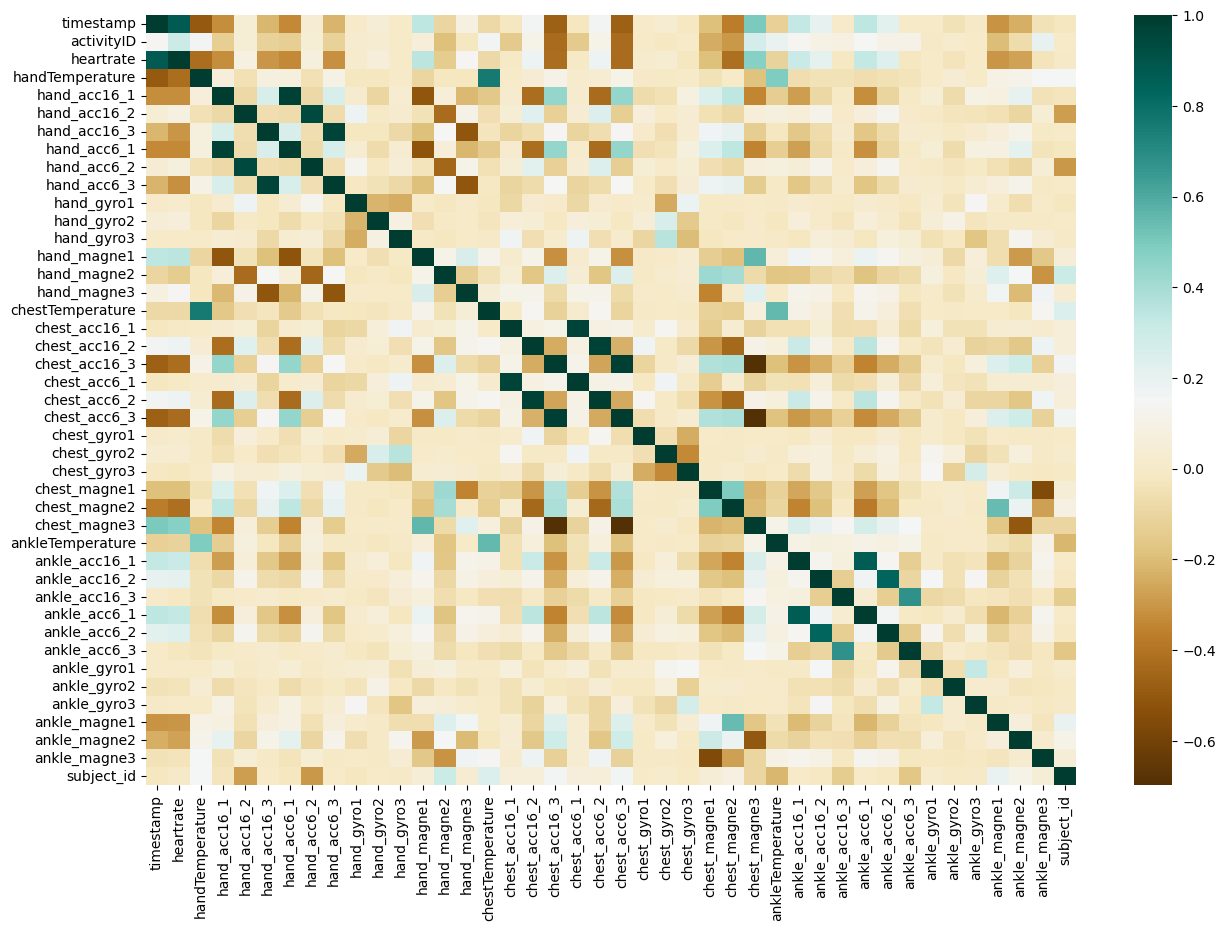

In [19]:
generate_heatmap(train_data)

Based on the heat map generated above,
we may observe that the correlation between accelereometer readings of hand and temperature are strongly correlated.They are strongly correlated for all three of the accelereometer instances.
It is also visible that the heart rate and chest magnemeters are correlated.

In [20]:
#Computing Pearson's correlation coeficient
heart=train_data['heartrate']
ctemp=train_data['chest_magne3']
spearmanr=stats.spearmanr(heart,ctemp)
print("Pearson's correlation coefficient is {}".format(spearmanr))

Pearson's correlation coefficient is SpearmanrResult(correlation=0.5019447607227822, pvalue=0.0)


# Activity - Time and HeartRate Analysis
Now let us consider the analysing time and heartrate with acivities.

       Here I will be calculating total elapsed time and mean heartrate for each activity underttaken by each
       subject id.Here we take the count of timestamp as it is not possible to calculate directly as some
       activities are interrepted by other actvities which then resumes after few timestamps as per the data
       provided.Hence the elapsedtime is calcaluated by dividing the total by 100.
       Similarly, we also calculate the mean heartrate for each activity for all the subject_ids.
       It is then followed by a plot of both mean heartrate and elapsedsec.
Let us now explore the time related to activities for each subject

In [21]:
#divide elapsed time by 100 to get total time spend for ech activity by subjects.
def change_milllisec(timest):
    calculated_time=timest/100
    return calculated_time

In [22]:
#Calculate mean heart rate and elapsed time
def elapsedtime_heartrate(train_data):
    #function : elapsed_time : to calculate the time for each activity by each subject
    #parameter : train_data : dataframe
    time_heart=train_data.groupby(['activityID','subject_id']).agg(elapsedtime=('timestamp', 'size'), mean_heartrate=('heartrate', 'mean'))
    time_heart['elapsedsec']=time_heart['elapsedtime'].map(change_milllisec)
    #time_activity=train_data.groupby(['activityID','subject_id']).agg(mean_heartrate=('heartrate', 'mean'))
    return time_heart

In [23]:
final=elapsedtime_heartrate(train_data)
final.head()

elapsedtime  mean_heartrate  elapsedsec
activityID subject_id                                         
1          1                 13673       76.608560      136.73
           2                 11668       75.883363      116.68
           3                 11009       75.389548      110.09
           4                 11542       75.429374      115.42
           5                 11852       75.602211      118.52

In [24]:
def plot_scatter_1(final):
    final.plot.scatter(x='elapsedsec',y = 'mean_heartrate')

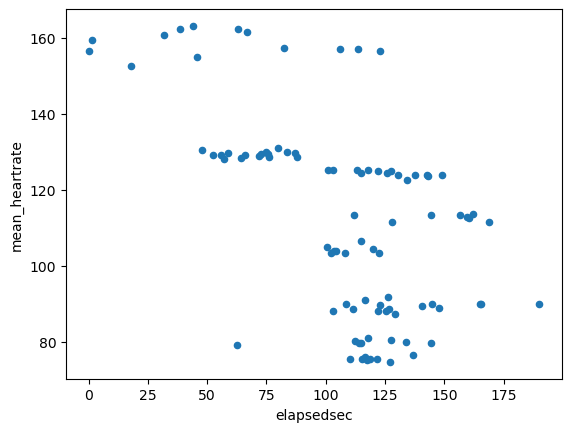

In [25]:
plot_scatter_1(final)

From the above graph ,
It is visible that the points form groups/clusters.Here we can observe two clusters

# Activity-heartrate Analysis
Let us now consider Heartrate and physical activity variations for a couple of  subject_ids.

In [26]:
#analyse heartrate and activity and plot graph
def activity_heartrate(train_data,sub_id):
    #Function:activity_heartrate() : plot graph based on average heartrate
    #parameters : train_data : dataframe
    #             sub_id: subject_id
    ttrain_data = train_data.loc[(train_data["subject_id"] == sub_id)]
    data_graph = ttrain_data['heartrate'].groupby(ttrain_data['activityID']).mean()
    data_graph.index = data_graph.index.map(activityIDdict)
    data_graph.plot(kind='bar')

Consider the first subject_id -> subject_id=1 ( a male of age 27 height: 182 weight :83)

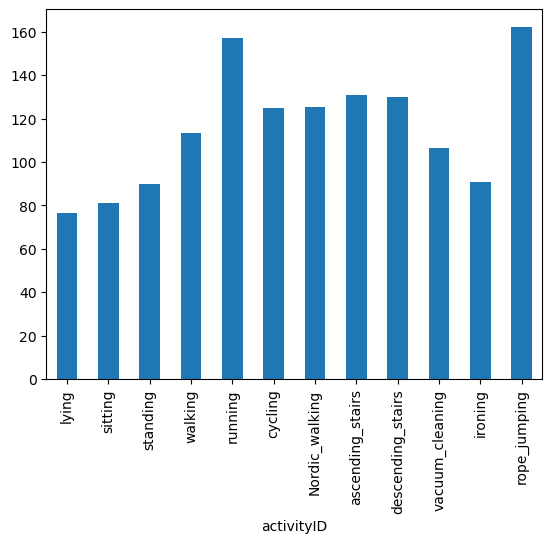

In [27]:

activity_heartrate(train_data,1)

It is visible that for subject_id :1, the mean heartrate increases with the intensity of activity carried out.
Similarly let us now consider another subject_id ,4 ( a male age: 24 height:194 weight:95)

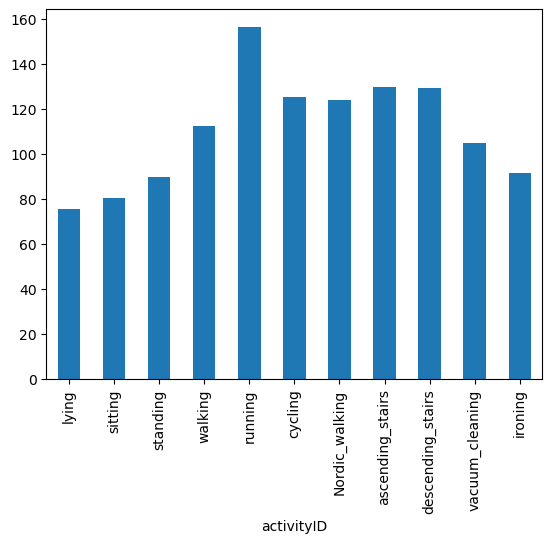

In [28]:
activity_heartrate(train_data,4)

The output seems to coincide with the previous observation.So far we can conclude the heart rate depends on the type of activity undertaken.Let us also consider the observation when the subjectid=2(a female age:25 height:169 weight:78)

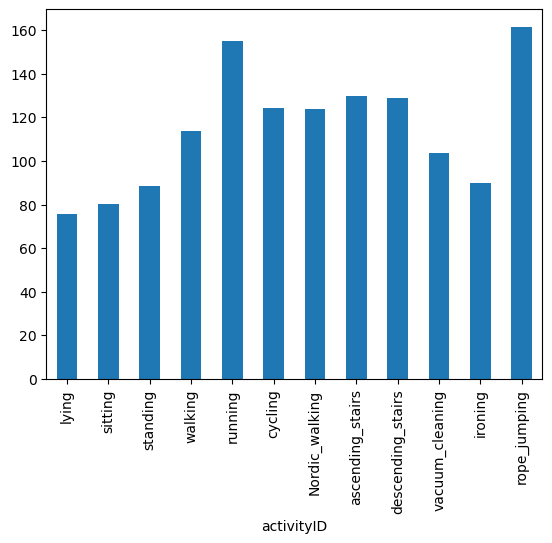

In [29]:
activity_heartrate(train_data,2)

From the graph observations,
We can conclude and generalise that the heartrate depends on the type of physical activity undertaken.the trend seems to be similiar in case of all the subjects.The activities "rope_jumping" and "running" has the highest avaerage heartrate compared to the  other activities in all cases.
ie,

In [30]:
grouped=data.groupby(['activityID'])['heartrate'].mean()
print(grouped.sort_values(ascending=False))

activityID
24    161.981391
5     156.595814
12    129.523485
13    129.154175
6     124.879952
7     123.828701
4     112.789865
16    104.198091
17     90.069591
3      88.557637
2      80.012582
1      75.535682
Name: heartrate, dtype: float64


Note that, activityids 24 and 5 corresponds rope jumping and running respectively.

# Hypothesis testing

Hypothesis:

    "IF, heart rate related to the type of physical activity undertaken 
    Then, intense the physical activity, higher the heart rate."
    
                   Independent Variable : Physical activity
                   Dependent Variable : Heart rate 

    H0 : The type of physical activty has no effect on the heartrate readings.
    
    H1 : The type of physical activity have an impact on the heartrate readings ie,intense the physical activity
    higher the heart rate.

In [31]:
rope_jumping = train_data.loc[(train_data["activityID"] == 24)]
running = train_data.loc[(train_data["activityID"] == 5)]
data_frame = [rope_jumping,running]
intense = pd.concat(data_frame)

Here i have considered rope_jumping as the the most intensified actvity  into rope_jumping hence created a dataframe and stored all the data where activity id is 24 that which corresponds to rope_jumping

In [32]:
p = (rope_jumping['heartrate'].mean() - train_data['heartrate'].mean()) / (rope_jumping['heartrate'].std() / math.sqrt( rope_jumping['heartrate'].count() ))
pValue = 1 - stats.norm.cdf(p)

if pValue > 0.1:
    print("The p_value is ", pValue, " and H1 is rejected.")
else :
    print("The p_value is ", pValue, " and H0 is rejected.") 

The p_value is  0.0  and H0 is rejected.


From the hypothesis testing we reject less intensity actvities as we alraedy proved that as the intensity increases heartrate also increases.

# Modelling

Here we are considering prediction of heartrate. hence i have decided to concentrate on the chest readings.
In the EDA section we have computed the correlation between different columns of the dataframe.
From the data observed,we may conclude  that they have more correlation between heartrate and chest_acc16_2, chest_magne3 respectively. hence we create and independent variable X which is a dataframe that includes both chest_acc16_2 and chest_magne3 and a list tar  which include the dependent variable "heartrate"

In [33]:
X=data[['chest_acc16_2','chest_magne3']]
#phytarget=phydata['heartrate']
tar = data['heartrate']

In the EDA phase,we computed data.corr() and concluded that there is no linear relatioships hence we cannot perform Linear regreassion.Hence, in the modelling process I have decided to move forward with polynomial regression and Randomforest Classifier

# Polynomial Regression
Polynomial regression  models relatioship between a dependent and independent variable as nth degree polynomial.If the datapoints does not fit a linear regression,It is ideal to use polynomial regression.
  
    Independent Variable : X :- Includes chest_acc16_2,chest_magne3 
    Dependent Variable.  : tar :-Includes heartrate

    Process involves:
        Transform the independent Variable X by calculatin till nth degree polynomial where n=8
        Obtain train test data by applying train_test_split inbult function to both X and tar.
        Apply poly_reg_model.fit(X_train,y_train) for fitting the data.
        Hence the corresponding model is created.
        
        later on,
        we compute the root mean squared error and the mean squared error inoerder to
        obtain the error.
        I have also provided an example for the same considering two values of X from the dataframe and
        prected the heart rate.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, tar, test_size=0.4,train_size=0.6,random_state=4798)

In [35]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [36]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print('The root mean squared error is {}'.format(poly_reg_rmse))
poly_mse=mean_squared_error(y_test, poly_reg_y_predicted)
print('The mean squared error is {}'.format(poly_mse))
poly_feat = poly.fit_transform([[1.930140,-54.463000]]) #taking an example from the dataframe
predict_heart= poly_reg_model.predict(poly_feat) #predicting the heartrate
predict_heart

The root mean squared error is 18.231773081444587
The mean squared error is 332.3975496932874


array([79.68052072])

# Random Forest Algorithm

Random Forest algorithm can be used for both classification and regression which makes it a very versatile modelling algorithm. As the name implies, Random Forest is a forest of trees, decision trees which are randomly populating the forest. The algorithms creates and combines decision trees together, the more trees in the forest, the better the accuracy of its predictions will be.

The process involves:
    
    A dataframe data_1 created by dropping activityID and timestamp and target which includes activityID
    Train test data split is done for both data_1 and target
    
    Import RandomForestClassifier and create a gaussian classifier clf and train the model
    Obtain the root mean sqaured error
    Accuracy of the model is also obtained
    An example is demonstarted for the same

In [37]:
data_1=data.drop(['activityID','timestamp'], axis=1)
target = data['activityID']
train_data,test_data,train_target,test_target = cross_validation.train_test_split(data_1,target,test_size=0.4,train_size=0.6,random_state=12345)

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_data,train_target)

y_pred=clf.predict(test_data)

In [39]:
rand_rmse = np.sqrt(mean_squared_error(test_target, y_pred))
print('The root mean squared error for Random Forest Classifier is {}'.format(rand_rmse))

The root mean squared error for Random Forest Classifier is 0.13153593226005367


In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_target, y_pred))

Accuracy: 0.9997027597024509


In [43]:
tes=data[data['subject_id']==3]
tes

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
839461,166.11,1,75.535682,31.0000,-1.43105,5.40588,7.774870,-1.25869,5.42474,7.86577,...,9.70353,0.999148,-0.697040,-0.201402,-0.059007,0.107266,-43.6954,1.163090,57.3792,3
839462,166.12,1,75.535682,31.0000,-1.57471,5.14382,8.043010,-1.42397,5.42599,7.92634,...,9.68799,0.953621,-0.817893,-0.240913,-0.067527,0.091327,-42.7963,0.696723,56.8717,3
839463,166.13,1,75.535682,31.0000,-1.88156,4.50119,8.040590,-1.62143,5.06513,8.10854,...,9.71766,0.968642,-0.908910,-0.372723,-0.060329,0.094986,-42.8046,1.573020,57.3762,3
839464,166.14,1,75.535682,31.0000,-1.84377,4.50090,8.041150,-1.62562,4.58187,8.09451,...,9.73190,1.074280,-1.106080,-0.345057,-0.102539,0.114357,-42.9115,0.921397,56.8751,3
839465,166.15,1,75.535682,31.0000,-1.78781,5.18687,8.424550,-1.73035,4.59780,8.17008,...,9.73166,1.134700,-1.166820,-0.435516,-0.078463,0.089137,-42.7882,0.467699,57.4881,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067165,2443.15,4,112.789865,28.6875,-1.20135,9.90925,-1.781750,-1.26926,10.12770,-1.79391,...,9.89845,1.029330,-0.788984,-0.157561,0.077097,0.775084,-22.6451,-6.823270,12.4377,3
1067166,2443.16,4,112.789865,28.6875,-1.23218,9.94916,-1.589910,-1.30068,9.88640,-1.70274,...,9.77915,1.044690,-0.576507,-0.100678,0.100662,0.740007,-22.8618,-6.935700,13.1809,3
1067167,2443.17,4,112.789865,28.6875,-1.34154,9.95104,-1.476090,-1.28472,9.91656,-1.62732,...,9.95965,0.954051,-0.516633,-0.064701,0.054579,0.731004,-22.5340,-6.825550,12.3130,3
1067168,2443.18,4,122.000000,28.6875,-1.02451,9.95240,-1.047990,-1.28208,9.97719,-1.37075,...,10.00460,0.863293,-0.531715,-0.063496,0.039095,0.730862,-22.6406,-6.938610,12.8077,3


In [46]:
tes_1=data.iloc[[2932]]
test1=tes_1.drop(['activityID','timestamp'], axis=1)
pred=clf.predict(test1)
print(pred)
tes_1

[1]


,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
5859,66.98,1,75.535682,30.6875,6.05492,4.98862,5.88707,6.13627,4.96176,5.89612,...,-0.627138,-7.7219,-6.18387,0.005983,-0.039797,0.020553,-14.5606,44.6709,-7.13134,1


# CONCLUSION


# Summary :
Let us divide the process into four phases:

    After loading all the required files into a data frame (datafr)
    
        Phase 1 : Data cleaning
                  Using function data_cleaning() cleaning is carried out
                  and we are provide with an output dataframe(data)
                  
        Phase 2 : Exploaratory data Analysis
                  Various EDA Analysis is done on the dataframe (data)
                  It includes correlation analysis which provided as with conclusion there is no linear
                  correlation
                  we also did the activity - time heartrate analysis and we obtained the scatterplot 
                  with clusters
                  Again, we performed activity heartrate analysis and plotted bar graph for a couple of
                  subjectids
                  and  figured out that heartrate depends on the intensity of actvities performed.
                  
       Phase 3 : Hypothesis Testing
                 In this phase,based on my EDA Analysis I created a hypothesis that which contexts as the 
                 intensity of actvity impacts the heartrate.
                 The ztest is carried out as we are dealing with large amount of data and the result favours my
                 hypothesis.
                 hence all the intense actvities can be accepted which includes running and rope jumping and 
                 rest can be rejected.
                 _
                 
      Phase  4:  Modelling
                 The prediction is carried out using two methods
                 Polynomial regression and Random Forest algorithm
                 An example for each is provided and both predictions are succesful.
                 
 Finally, we have performed all the requirements where all the above mentioned phases are completed succesfully.
              
                  